# Creating Data

Before we can test out the implementation, we need to create some data. To create the best case for logistic regression, I am sampling independent Bernoulli trials where the probability of a `1` is $\frac{1}{1+e^{X\beta}}$. This is the exact form that logistic regression assumes.

In [2]:
from LinearModel import LogisticRegression
import numpy as np
from scipy.stats import bernoulli
import matplotlib.pyplot as plt

# Set a random seed for reproducibility.
np.random.seed(2)

# Set the dimensions of the training data.
n, cols = 1000, 4

beta = np.random.normal(scale=1, size=cols)
x = np.random.normal(size=(n, cols-1))

X = np.insert(x, 0, np.repeat(1, n), axis=1)

log_odds = np.matmul(X, beta) + np.random.normal(scale=0.001, size=n)
probs = 1/(1+np.exp(-log_odds))

my_bernoulli = bernoulli(p=probs)
y = my_bernoulli.rvs()

my_logistic = LogisticRegression()
my_logistic.add_intercept = False
my_logistic.fit(X, y, method="Newton-CG")

As you can see from the plot, the predicted and true probabilities, which in practice are unknowable, have a tight linear relationship. They stick close to where the line segment from (0, 0) to (1, 1) would be, which is exactly what we want. Of course this was set up to be a perfect case for logisitic regression.

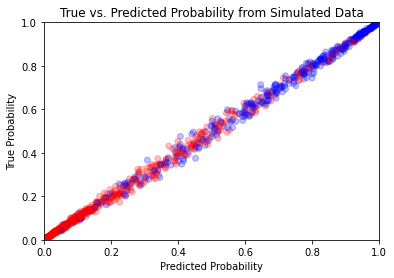

In [3]:
plt.scatter(my_logistic.predict_probabilities(X), probs,
            color=np.where(y == 1, "blue", "red"),
            alpha=0.25)
plt.title("True vs. Predicted Probability from Simulated Data")
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.ylim(0, 1)
plt.xlim(0,1)
plt.show()

In [4]:
print(np.round(my_logistic.beta_hat, 4))

[-0.4032 -0.1561 -2.1321  1.6984]


In [5]:
 y_hat = my_logistic.predict_classes(X)

np.sum(y_hat == y)/n

0.86

In [5]:
import statsmodels.api as sm

# building the model and fitting the data
log_reg = sm.Logit(y, X).fit()

print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.375309
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      996
Method:                           MLE   Df Model:                            3
Date:                Thu, 10 Jun 2021   Pseudo R-squ.:                  0.4496
Time:                        18:47:13   Log-Likelihood:                -375.31
converged:                       True   LL-Null:                       -681.85
Covariance Type:            nonrobust   LLR p-value:                1.464e-132
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4030      0.093     -4.353      0.000      -0.584      -0.222
x1            -0.1561      0.